# EDA Crashes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from raw_to_transformed_data import get_sql_data
from plotting_functions import injury_vs_no_injury_plot

pd.set_option("display.max_columns", None)
plt.style.use("ggplot")
%matplotlib inline

In [2]:
query_crashes = """
    SELECT *
    FROM crashes;
    """
dbname = "chi-traffic-accidents"

In [3]:
df_crashes = get_sql_data(dbname, query_crashes)

In [4]:
df_crashes["has_injuries"] = np.where(df_crashes["injuries_total"]==0, False, True)

In [5]:
df_crashes.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,prim_contributory_cause,street_direction,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,intersection_related_i,hit_and_run_i,lane_cnt,has_injuries
0,7a63945a9bae12c05dee82c1962bf40f23cdd02ca655d7...,2021-08-01 03:42:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,DISREGARDING OTHER TRAFFIC SIGNS,S,2,0.0,3,1,8,None,None,NaN,False
1,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,2021-08-01 02:41:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),DISREGARDING TRAFFIC SIGNALS,N,2,1.0,2,1,8,Y,Y,NaN,True
2,bba4db7cfef29230aa5d24f6b8912a2539b5d6f481a94e...,2021-08-01 02:26:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,IMPROPER TURNING/NO SIGNAL,S,2,0.0,2,1,8,None,None,NaN,False
3,1e39110c6e01fd2f24e282cd610eb90d6f98a6241ab193...,2021-08-01 02:22:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,UNABLE TO DETERMINE,S,2,1.0,2,1,8,N,Y,NaN,True
4,d20d9db8a88fc227d48392b45380ae57898e5fcdcda7db...,2021-08-01 02:08:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,IMPROPER LANE USAGE,W,3,2.0,2,1,8,None,Y,NaN,True


## Number of crashes with injuries

In [6]:
df_crashes.shape

(526569, 24)

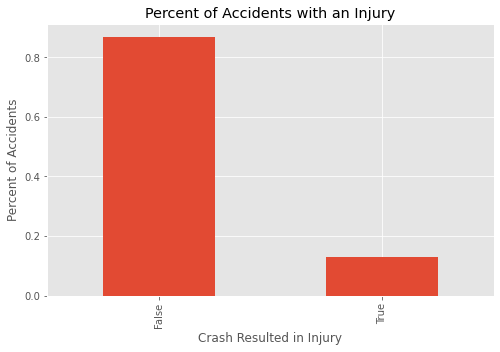

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
(df_crashes["has_injuries"]
     .value_counts(dropna=False, normalize=True)
     .plot(kind="bar", ax=ax))
ax.set_title("Percent of Accidents with an Injury")
ax.set_xlabel("Crash Resulted in Injury")
ax.set_ylabel("Percent of Accidents");

In [8]:
np.round(df_crashes["has_injuries"].value_counts(dropna=False, normalize=True)*100, 0)

False    87.0
True     13.0
Name: has_injuries, dtype: float64

Crashes with injuries

In [9]:
(df_crashes
    .loc[df_crashes["has_injuries"]==True, "injuries_total"]
    .value_counts(dropna=False, normalize=True)).index.values.astype(int)

# (df_crashes
#     .loc[df_crashes["has_injuries"]==True, "injuries_total"]
#     .value_counts(dropna=False, normalize=True)).reindex(index=)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 11, 12, 13, 21, 19, 16])

In [10]:
perc_num_accidents = (df_crashes
    .loc[df_crashes["has_injuries"]==True, "injuries_total"]
    .value_counts(dropna=False, normalize=True))
perc_num_accidents = perc_num_accidents.reindex(
    index=perc_num_accidents.index.values.astype(int))
perc_num_accidents = perc_num_accidents.sort_index()
perc_num_accidents

1     0.755296
2     0.165080
3     0.050273
4     0.018063
5     0.006703
6     0.002626
7     0.000987
8     0.000348
9     0.000232
10    0.000131
11    0.000073
12    0.000029
13    0.000029
15    0.000073
16    0.000015
19    0.000015
21    0.000029
Name: injuries_total, dtype: float64

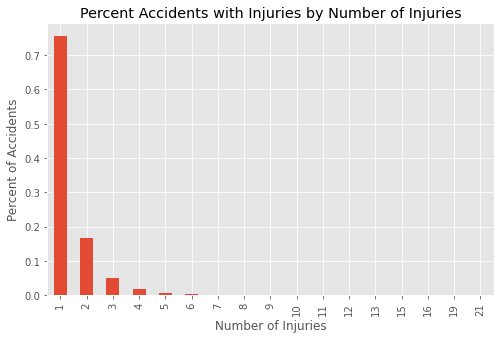

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
perc_num_accidents.plot(kind="bar", ax=ax)
ax.set_title("Percent Accidents with Injuries by Number of Injuries")
ax.set_xlabel("Number of Injuries")
ax.set_ylabel("Percent of Accidents");

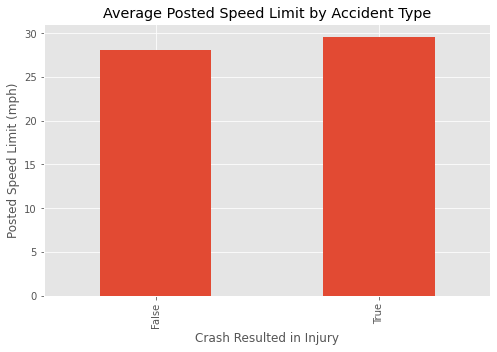

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
(df_crashes
    .groupby("has_injuries")["posted_speed_limit"]
    .mean().plot(kind="bar", ax=ax))
ax.set_title("Average Posted Speed Limit by Accident Type")
ax.set_xlabel("Crash Resulted in Injury")
ax.set_ylabel("Posted Speed Limit (mph)");

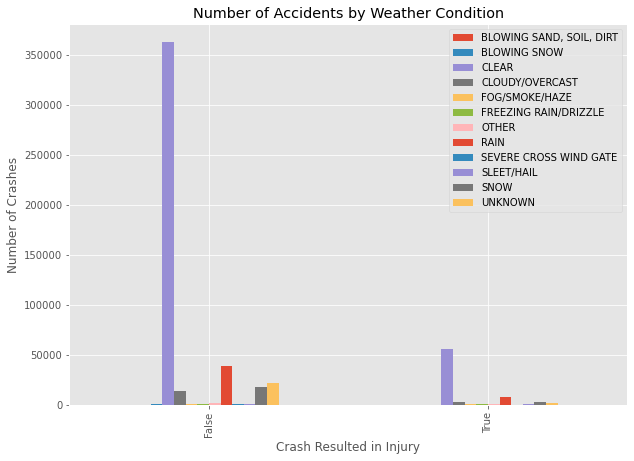

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
(df_crashes
    .groupby(["has_injuries", "weather_condition"])["crash_record_id"]
    .count()
    .reset_index()
    .set_index("has_injuries")
    .pivot(columns="weather_condition", values="crash_record_id")
    .fillna(0.0)).plot(kind="bar", ax=ax)
ax.set_title("Number of Accidents by Weather Condition")
ax.set_xlabel("Crash Resulted in Injury")
ax.set_ylabel("Number of Crashes")
ax.legend(title=None);

In [14]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


In [15]:
print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>


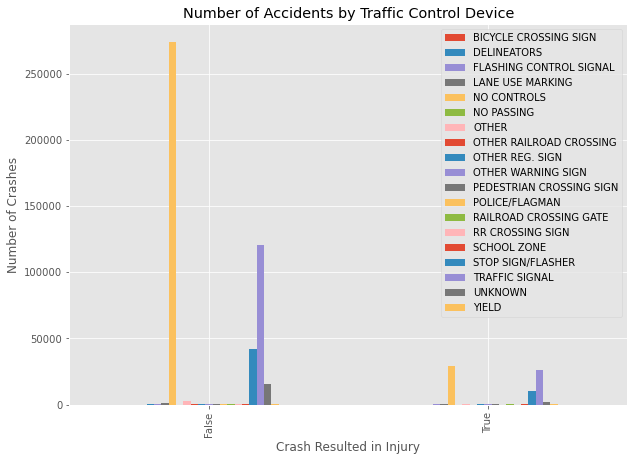

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
(df_crashes
    .groupby(["has_injuries", "traffic_control_device"])["crash_record_id"]
    .count()
    .reset_index()
    .set_index("has_injuries")
    .pivot(columns="traffic_control_device", values="crash_record_id")
    .fillna(0.0)).plot(kind="bar", ax=ax)
ax.set_title("Number of Accidents by Traffic Control Device")
ax.set_xlabel("Crash Resulted in Injury")
ax.set_ylabel("Number of Crashes")
ax.legend(title=None);

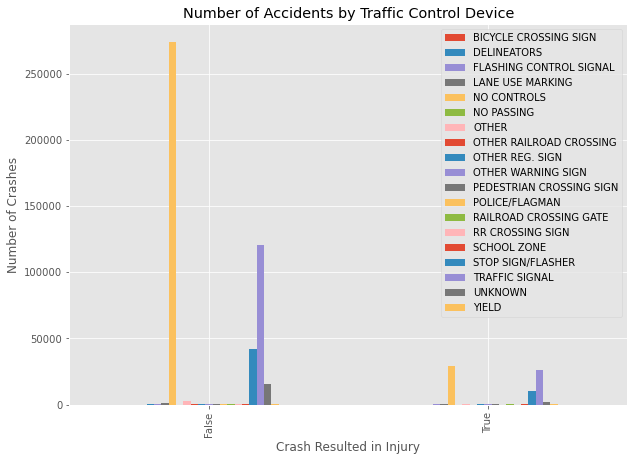

In [22]:
injury_vs_no_injury_plot(
    df_crashes, "traffic_control_device", 
    title="Number of Accidents by Traffic Control Device",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

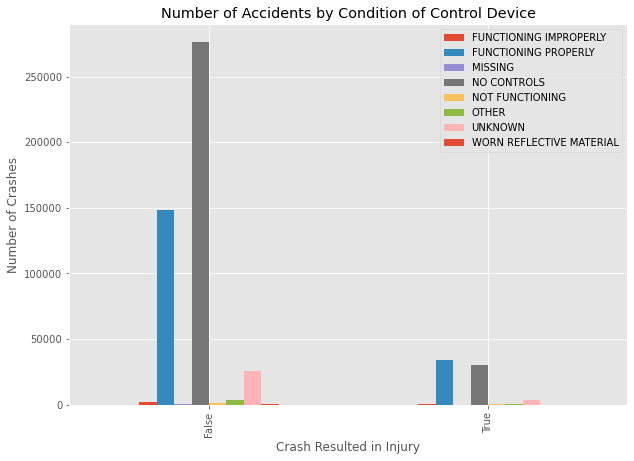

In [23]:
injury_vs_no_injury_plot(
    df_crashes, "device_condition", 
    title="Number of Accidents by Condition of Control Device",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

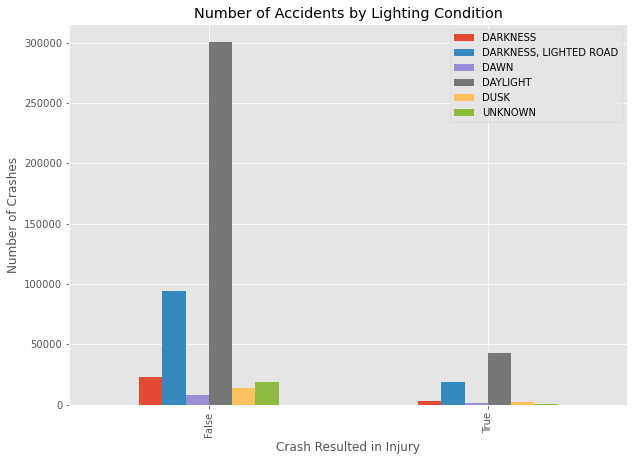

In [24]:
injury_vs_no_injury_plot(
    df_crashes, "lighting_condition", 
    title="Number of Accidents by Lighting Condition",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

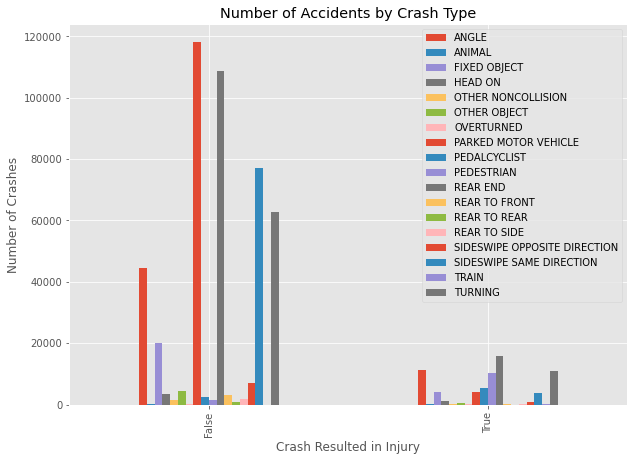

In [25]:
injury_vs_no_injury_plot(
    df_crashes, "first_crash_type", 
    title="Number of Accidents by Crash Type",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

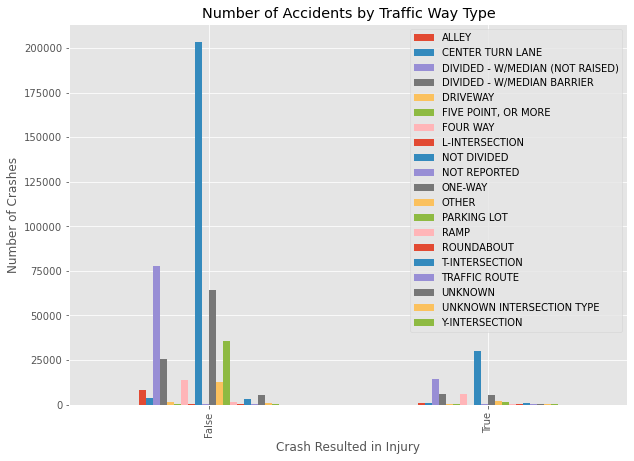

In [27]:
injury_vs_no_injury_plot(
    df_crashes, "trafficway_type", 
    title="Number of Accidents by Traffic Way Type",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

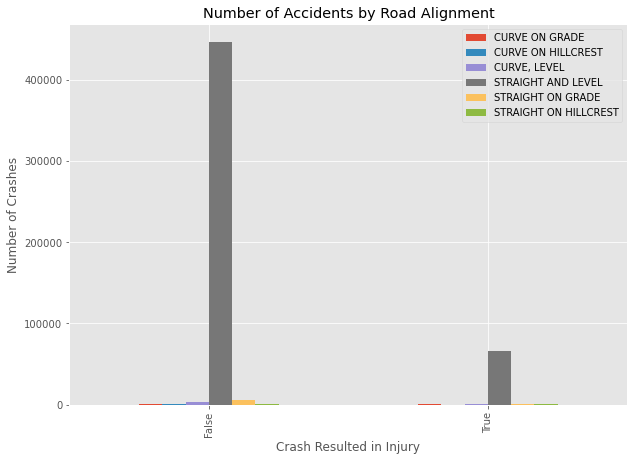

In [29]:
injury_vs_no_injury_plot(
    df_crashes, "alignment", 
    title="Number of Accidents by Road Alignment",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

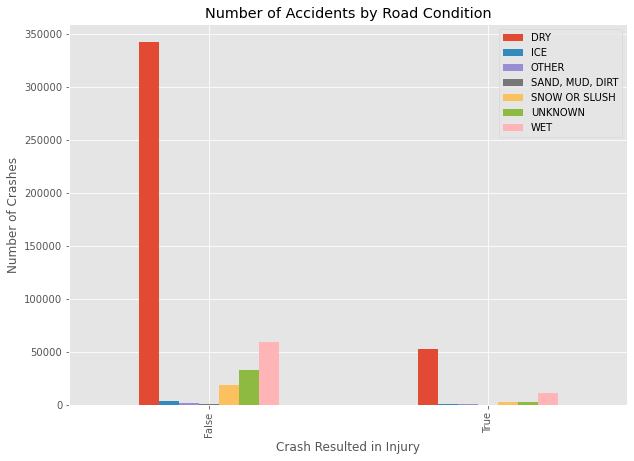

In [30]:
injury_vs_no_injury_plot(
    df_crashes, "roadway_surface_cond", 
    title="Number of Accidents by Road Condition",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

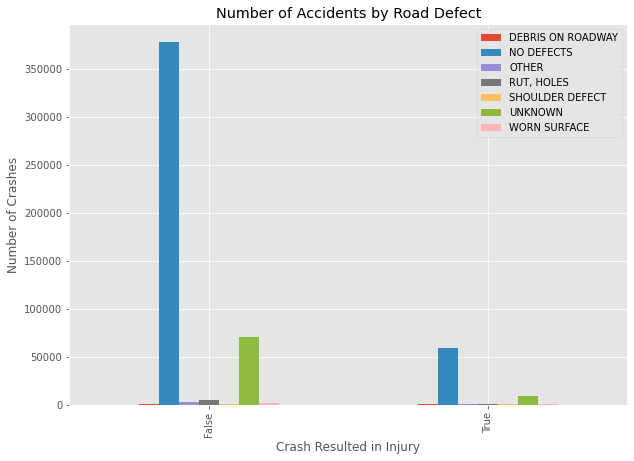

In [31]:
injury_vs_no_injury_plot(
    df_crashes, "road_defect", 
    title="Number of Accidents by Road Defect",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

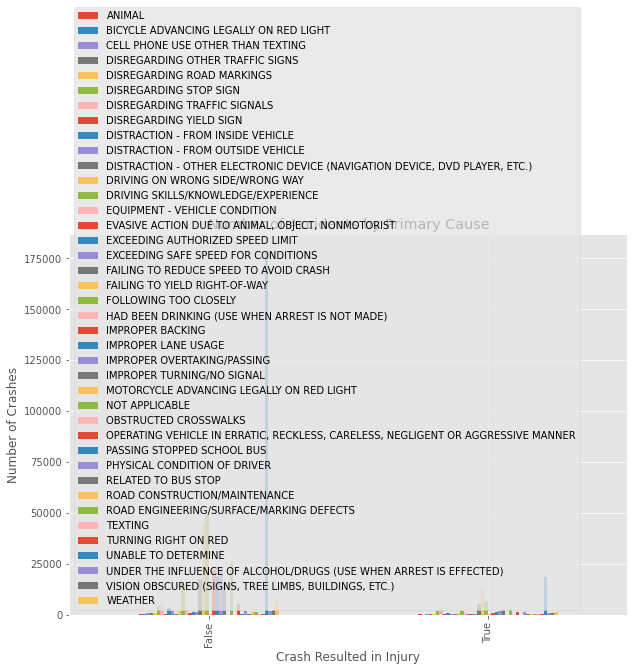

In [32]:
injury_vs_no_injury_plot(
    df_crashes, "prim_contributory_cause", 
    title="Number of Accidents by Primary Cause",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

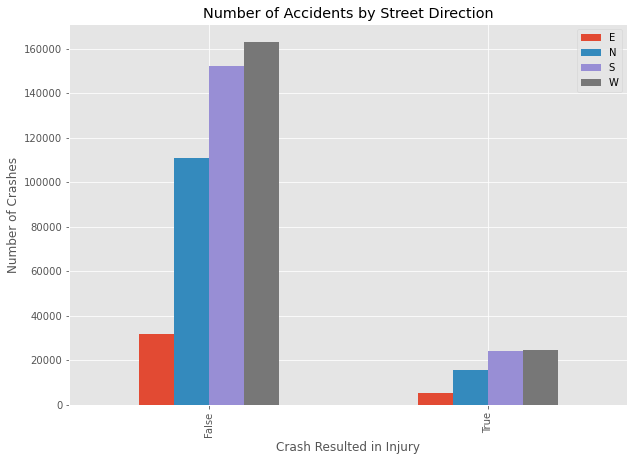

In [33]:
injury_vs_no_injury_plot(
    df_crashes, "street_direction", 
    title="Number of Accidents by Street Direction",
    xlabel="Crash Resulted in Injury",
    ylabel="Number of Crashes");

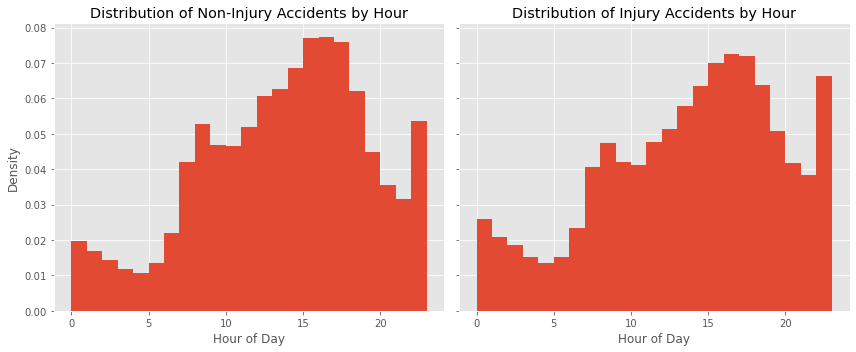

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df_crashes.loc[df_crashes["has_injuries"]==False, "crash_hour"].plot(kind="hist", bins=23, ax=ax[0], density=True)
df_crashes.loc[df_crashes["has_injuries"]==True, "crash_hour"].plot(kind="hist", bins=23, ax=ax[1], density=True)
ax[0].title.set_text("Distribution of Non-Injury Accidents by Hour")
ax[1].title.set_text("Distribution of Injury Accidents by Hour")
ax[0].set_xlabel("Hour of Day")
ax[1].set_xlabel("Hour of Day")
ax[0].set_ylabel("Density")
fig.tight_layout();

In [18]:
df_crashes.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,prim_contributory_cause,street_direction,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,intersection_related_i,hit_and_run_i,lane_cnt,has_injuries
0,7a63945a9bae12c05dee82c1962bf40f23cdd02ca655d7...,2021-08-01 03:42:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,DISREGARDING OTHER TRAFFIC SIGNS,S,2,0.0,3,1,8,None,None,NaN,False
1,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,2021-08-01 02:41:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),DISREGARDING TRAFFIC SIGNALS,N,2,1.0,2,1,8,Y,Y,NaN,True
2,bba4db7cfef29230aa5d24f6b8912a2539b5d6f481a94e...,2021-08-01 02:26:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,IMPROPER TURNING/NO SIGNAL,S,2,0.0,2,1,8,None,None,NaN,False
3,1e39110c6e01fd2f24e282cd610eb90d6f98a6241ab193...,2021-08-01 02:22:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,UNABLE TO DETERMINE,S,2,1.0,2,1,8,N,Y,NaN,True
4,d20d9db8a88fc227d48392b45380ae57898e5fcdcda7db...,2021-08-01 02:08:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,IMPROPER LANE USAGE,W,3,2.0,2,1,8,None,Y,NaN,True


In [19]:
groups = [[23,135,3], [123,500,1]]
group_labels = ['views', 'orders']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T
df

,views,orders
0,23,123
1,135,500
2,3,1


In [20]:
pd.concat(
    [df.mean().rename('average'), df.min().rename('min'), 
     df.max().rename('max')],
    axis=1)

,average,min,max
views,53.666667,3,135
orders,208.000000,1,500


<AxesSubplot:>

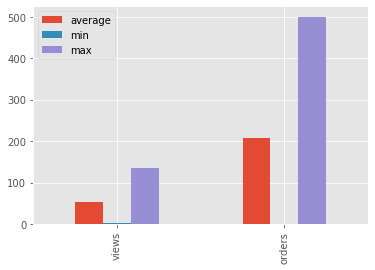

In [21]:
pd.concat(
    [df.mean().rename('average'), df.min().rename('min'), 
     df.max().rename('max')],
    axis=1).plot.bar()